In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import seaborn as sns

In [2]:
penguins = sns.load_dataset("penguins")

In [3]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [7]:
penguins.species.describe()

count        344
unique         3
top       Adelie
freq         152
Name: species, dtype: object

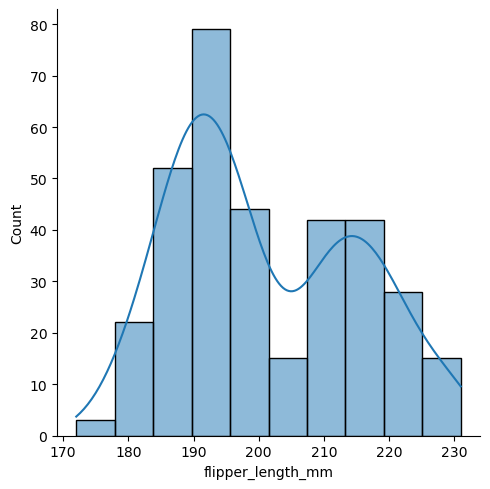

In [6]:
sns.displot(data=penguins, x="flipper_length_mm", kde=True)

In [10]:
import numpy as np
from sklearn.model_selection import KFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4])
kf = KFold(n_splits=4)
kf_num = kf.get_n_splits(X)
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[1 2 3]
  Test:  index=[0]
Fold 1:
  Train: index=[0 2 3]
  Test:  index=[1]
Fold 2:
  Train: index=[0 1 3]
  Test:  index=[2]
Fold 3:
  Train: index=[0 1 2]
  Test:  index=[3]


In [18]:
from sklearn.preprocessing import StandardScaler, scale
from sklearn.pipeline import Pipeline
from sklearn.neighbors import (KNeighborsClassifier, KNeighborsRegressor)
from sklearn.model_selection import (cross_val_score, cross_val_predict, GridSearchCV)

pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsRegressor(n_neighbors=2))])
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [4,9]])
y = np.array([1, 2, 3, 4, 5])
y_pred = cross_val_predict(pipe, X, y, cv=5)
y_score = cross_val_score

array([2.5, 2.5, 1.5, 1.5, 3. ])